In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
import nltk
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows',None)

import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
#import oliver_acquire as a

In [3]:
#scrape = a.scrape_github_data()

In [4]:
#data = pd.DataFrame(scrape)

In [5]:
#data.to_csv('git_url.csv')

In [6]:
#df = pd.read_csv('git_url.csv', index_col=0)

In [7]:
df = pd.read_json('data.json')

In [8]:
df = df.drop_duplicates()

In [9]:
df

repo language  \
0                  janishar/mit-deep-learning-book-pdf     Java   
1                                       Angel-ML/angel     Java   
2                                      Alluxio/alluxio     Java   
3                                       haifengl/smile     Java   
4                                        alibaba/Alink     Java   
5                                       ICT-BDA/EasyML     Java   
6                                     OryxProject/oryx     Java   
7                                      kermitt2/grobid     Java   
8                               SeldonIO/seldon-server     Java   
9    MindorksOpenSource/AndroidTensorFlowMachineLea...     Java   
10                 o19s/elasticsearch-learning-to-rank     Java   
11                         datumbox/datumbox-framework     Java   
12                                       oracle/tribuo     Java   
13                                        mimno/Mallet     Java   
14                                 imageprocessor/cv4j     Java   
15   kaiwaehner/kafka-streams-machine-learning-exam...     Java   
16                                     EdwardRaff/JSAT     Java   
17   amitshekhariitbhu/Android-TensorFlow-Lite-Example     Java   
18                                    apache/submarine     Java   
19                                         Waikato/moa     Java   
20                                      antlr/codebuff     Java   
21                                pmerienne/trident-ml     Java   
22                                     etsy/Conjecture     Java   
23                                         hanuor/onyx     Java   
24                                  yuantiku/ytk-learn     Java   
25                                      linkedin/dagli     Java   
26                   opendistro-for-elasticsearch/k-NN     Java   
27                                     pushkar/ABAGAIL     Java   
28                                       ShifuML/shifu     Java   
29                                        Waikato/meka     Java   
30                           HongZhaoHua/jstarcraft-ai     Java   
31                                    cheng-li/pyramid     Java   
32                               sea-boat/TextAnalyzer     Java   
33                     afsalashyana/FakeImageDetection     Java   
34                                     RumbleDB/rumble     Java   
35                                   ogrisel/pignlproc     Java   
36                        projectmatris/antimalwareapp     Java   
37                             kermitt2/entity-fishing     Java   
38                       SmartDataAnalytics/DL-Learner     Java   
39                                         yinlou/mltk     Java   
40                                     apache/flink-ml     Java   
41            Daniel-Liu-c0deb0t/Java-Machine-Learning     Java   
42                            algorithmfoundry/Foundry     Java   
43                                     ClearTK/cleartk     Java   
44                           uea-machine-learning/tsml     Java   
45                                      wen-fei/choice     Java   
46                              goessl/MachineLearning     Java   
47                                  Nova41/SnowLeopard     Java   
48                                      amidst/toolbox     Java   
49                                anbud/MarkovComposer     Java   
50                               tensorflow/tensorflow      C++   
51                           TheAlgorithms/C-Plus-Plus      C++   
52                                 PaddlePaddle/Paddle      C++   
53                                  microsoft/LightGBM      C++   
54                                           onnx/onnx      C++   
55                                      davisking/dlib      C++   
56                                    apple/turicreate      C++   
57                               bulletphysics/bullet3      C++   
58                          VowpalWabbit/vowpal_wabbit      C++   
59                            

In [10]:
#removing missing values
#remove the rows that have missing values in language
df = df.dropna(axis=0).reset_index(drop=True)

In [11]:
#change jupyter notebook to python
#df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

In [12]:

#import pycld2 as cld2
#def remove_nonenglish (df):
    #'''
     #takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    #'''
    #for n in range (0, len(df)):
        #text = df.readme_contents[n]
        #lang = cld2.detect(text)
        #if lang != 'en':
            #df =df.drop([n])
        #return df.reset_index(drop=True)


In [13]:
#import pycld2 as cld2
#text = 'house is blue'
#lang = cld2.detect(text)
#print(lang)

In [14]:
#Not the best at detect english
#remove_nonenglish(df)

In [15]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].language.values)
    #get new df with only the top n values of target
    df= df[df.language.isin(topl)].reset_index(drop=True)
    return  df

In [16]:
df = top_n_target(df, 'language', 3)

In [17]:
df.language.value_counts()

Java      50
C++       50
Python    50
Name: language, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             150 non-null    object
 1   language         150 non-null    object
 2   readme_contents  150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [19]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"\w*.?\w*@\w*.com", '', string)
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)

    return string

In [20]:
def tokenize (string):
    '''
    take in a string and tokenize all the words in the string
    '''
    
    # Create the tokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()
    # Use the tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    return string


def stem (string):
    '''
     takes in a text and return the text after applying stemming to all the words.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    # Apply the stemmer to each word in our string.
    stems = [ps.stem(word) for word in string.split()]
    text_stemmed = ' '.join(stems)
    return text_stemmed 



def lemmatize (text):
    '''
     Takes in some text and return the text after applying lemmatization to each word.
    '''
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in text.split()]
    
    # Join our list of words into a string again; assign to a variable to save changes.
    text_lemmatized = ' '.join(lemmas)
    
    return text_lemmatized
    


def remove_stopwords (string, extra_words= [], exclude_words=[]):
    '''
    Takes in a strand return the text after removing all the stopwords.
    Parameters:
    string : text in  string type
    extra_words : list of additional stop words to include,
    exclude_words : list of any words that we don't want to remove.
    '''
    # standard English language stopwords list from nltk
    stopword_list = stopwords.words('english')
    
    #add extra_words
    stopword_list =stopword_list + extra_words
    
    #exclude words
    for element in exclude_words:
        if element in stopword_list:
            stopword_list.remove(element)
    # Split words.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings; assign to a variable to keep changes.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [21]:
def prepare_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the  original text, cleaned (tokenized and stopwords removed) , stemmed text,
    lemmatized text.
    '''
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(stem)
    
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    return df

In [22]:
def split_data(df, target):
    '''
        This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes
    
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    
    
    print(f'complete df -> {df.shape}')
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')

    return train, validate, test

In [23]:
#clean, tokenized, stemming, lemmatize
df = prepare_data(df,'readme_contents')

In [24]:
df.head()

repo language  \
0  janishar/mit-deep-learning-book-pdf     Java   
1                       Angel-ML/angel     Java   
2                      Alluxio/alluxio     Java   
3                       haifengl/smile     Java   
4                        alibaba/Alink     Java   

                                     readme_contents  \
0  [![Download](https://img.shields.io/badge/down...   
1  ![](assets/angel_logo.png)\n\n[![license](http...   
2  [![logo](docs/resources/alluxio_logo.png "Allu...   
3  # Smile\n\n[![Join the chat at https://gitter....   
4  <font size=7>English| [简体中文](README.md)</font>...   

                                               clean  \
0  mit deep learning book beautiful flawless pdf ...   
1  highperformance distributed machine learning g...   
2  logodocsresourcesalluxiologopng formerly known...   
3  chat statistical machine intelligence learning...   
4  font size7english machine learning algorithm p...   

                                             stemmed  \
0  mit deep learn book beauti flawless pdf deep l...   
1  highperform distribut machin learn graph compu...   
2  logodocsresourcesalluxiologopng formerli known...   
3  chat statist machin intellig learn fast compre...   
4  font size7english machin learn algorithm platf...   

                                          lemmatized  
0  mit deep learning book beautiful flawless pdf ...  
1  highperformance distributed machine learning g...  
2  logodocsresourcesalluxiologopng formerly known...  
3  chat statistical machine intelligence learning...  
4  font size7english machine learning algorithm p...

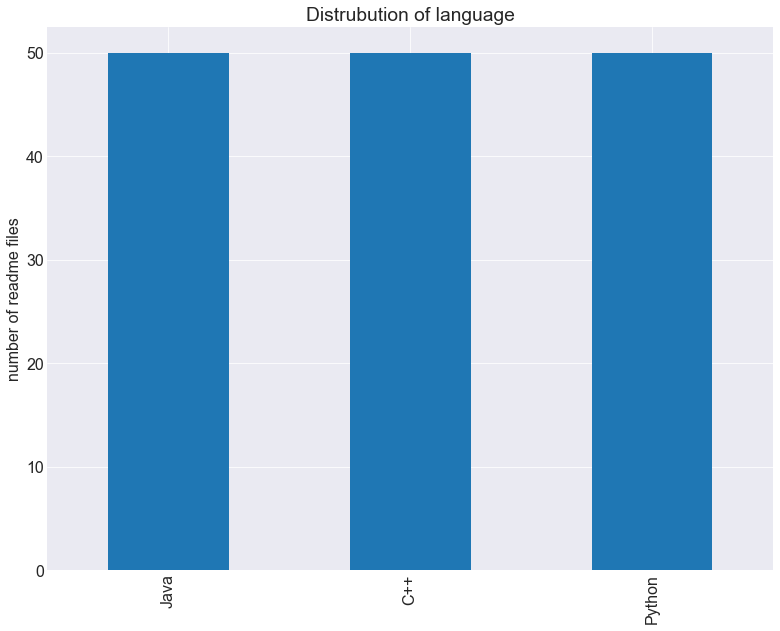

In [25]:
df.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

In [26]:
#split train, validate and test
train, validate, test = split_data(df, 'language')

complete df -> (150, 6)
train -> (84, 6)
validate -> (36, 6)
test -> (30, 6)


# What are the most common words in READMEs?

In [27]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [28]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = basic_clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= basic_clean(' '.join(train.lemmatized))

In [29]:
#check if we have all the languages
join_text.keys()

dict_keys(['Java', 'C++', 'Python', 'all_words'])

In [30]:
#Represent text as word frequencies.
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [31]:
word_counts.sort_values('all_words', ascending=False).head()

Java  C++  Python  all_words
9         111    6    4795       4912
install    14   81     996       1091
open       16   21     664        701
clone       3   16     641        660
pip        11   18     626        655

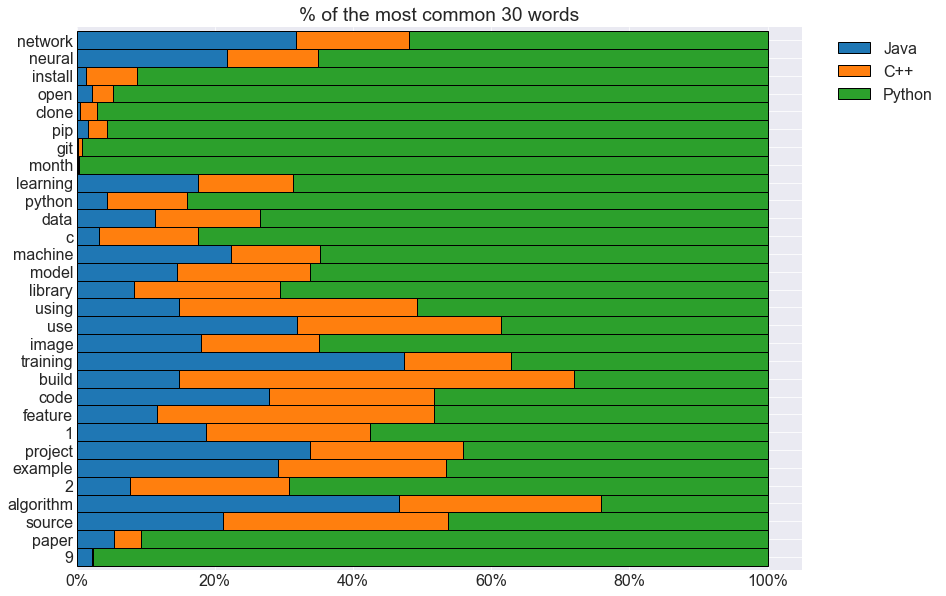

In [32]:
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(30)
 .apply(lambda row: row / row['all_words'], axis=1)
 .sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of the most common 30 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.show()

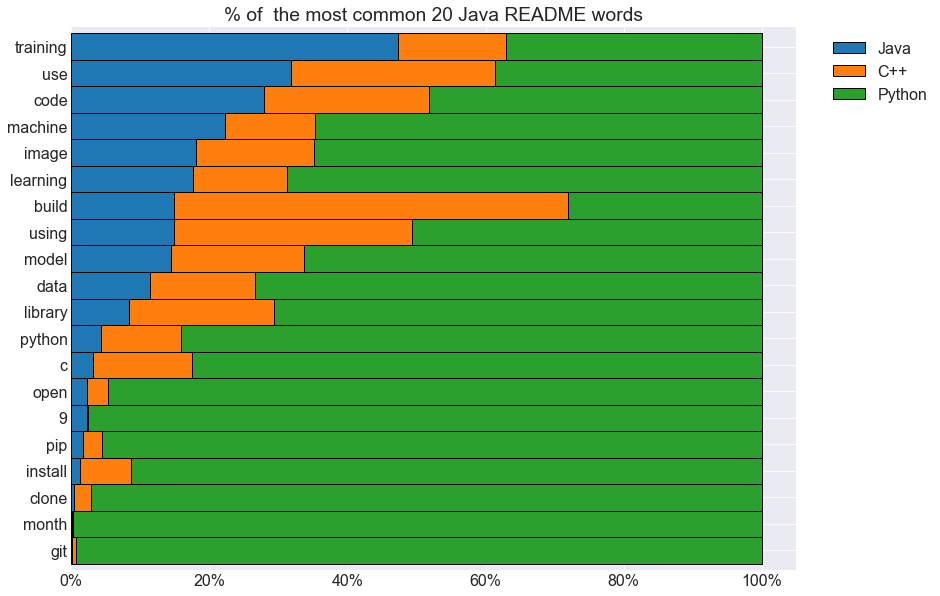

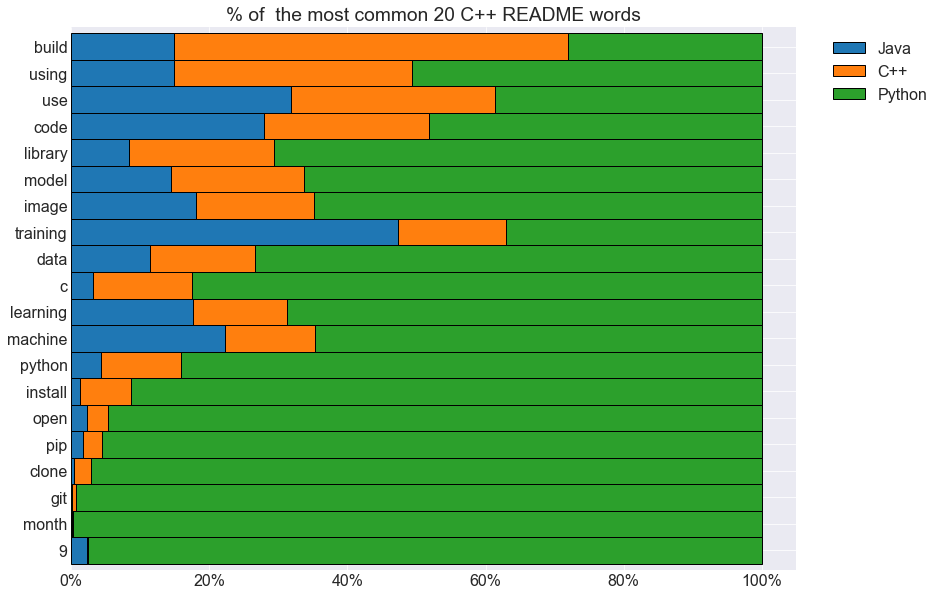

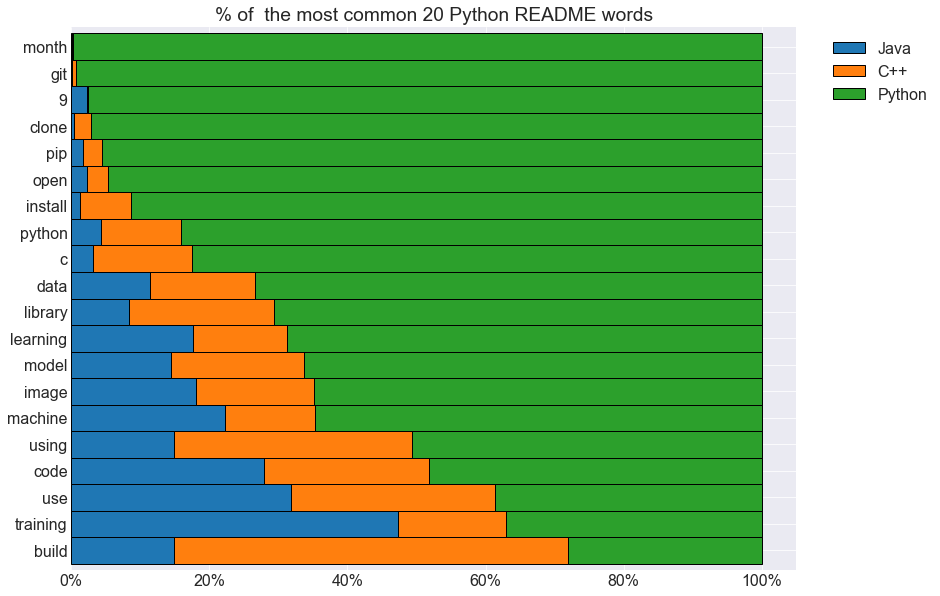

In [33]:
#most common words sorted by each language
for column in word_counts.drop(columns='all_words'):
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show()

In [34]:
def word_cloud (text):
    '''
    takes in a text and create a wordcloud
    '''
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def wordcloud_top(df,column, n_top=50):
    '''
    takes in a df , column and a number of top words to show
    '''
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))


def ngrams_wordcloud (text, title,  n=2, top = 20):
    '''
    takes in a text, title, number of ngrams, and number of the top words
    returns a plot barh and a word_cloud
    '''
    #plot barh
    
    plt.subplot(2,2,1)
    pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top).sort_values(ascending = True).plot.barh()
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    
    #word_cloud
    ng =(pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top)).to_dict()
    ng_words = {k[0] + ' ' + k[1]: v for k, v in ng.items()}
    plt.subplot(2,2,2)
    img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ng_words)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    #plt.tight_layout()
    plt.show()

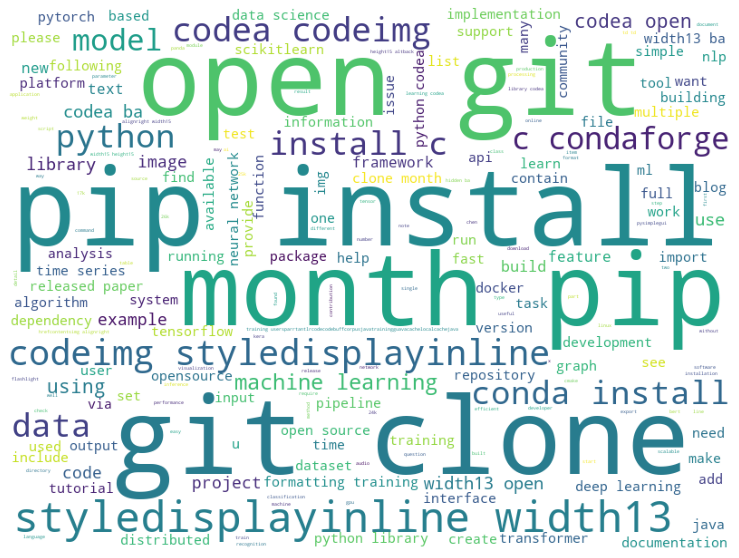

In [35]:
word_cloud(join_text['all_words'])

 ********************* Language : Java *********************


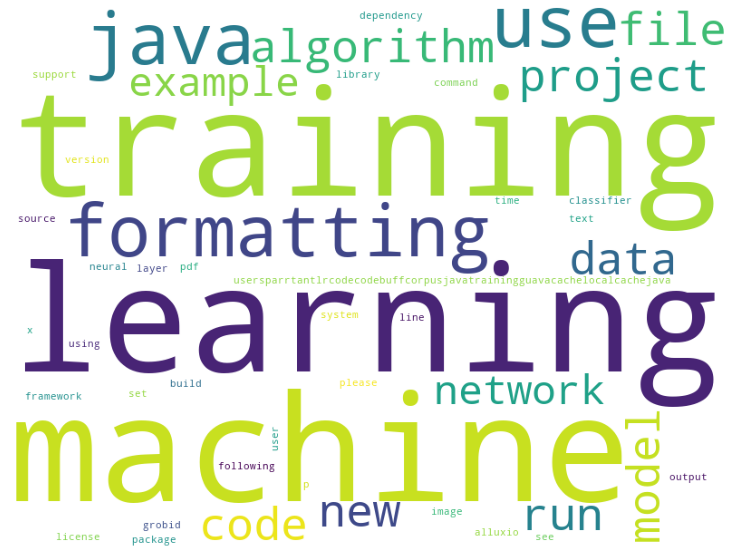

 
 ********************* Language : C++ *********************


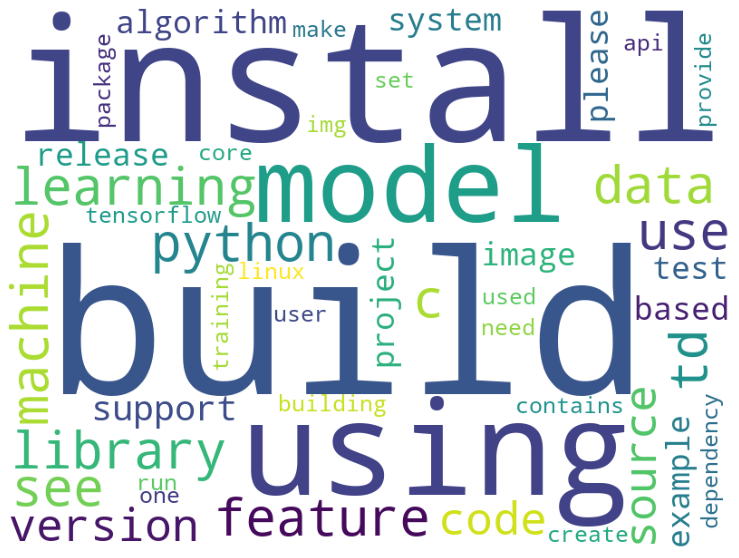

 
 ********************* Language : Python *********************


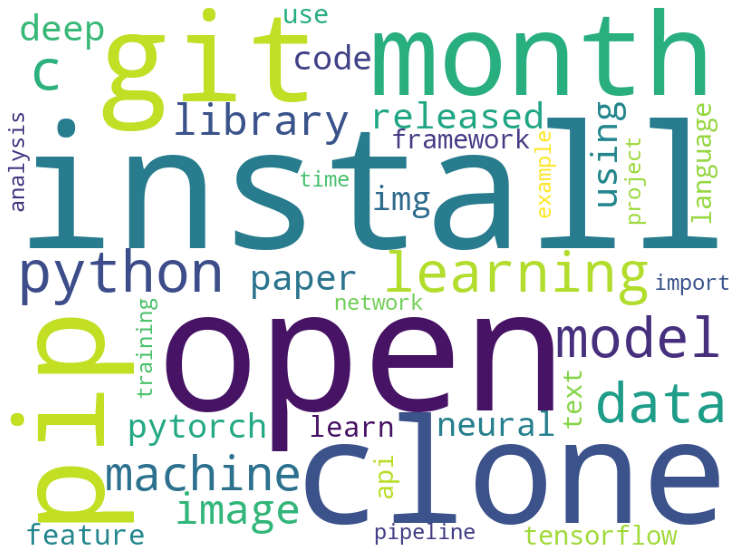

 
 ********************* Language : all_words *********************


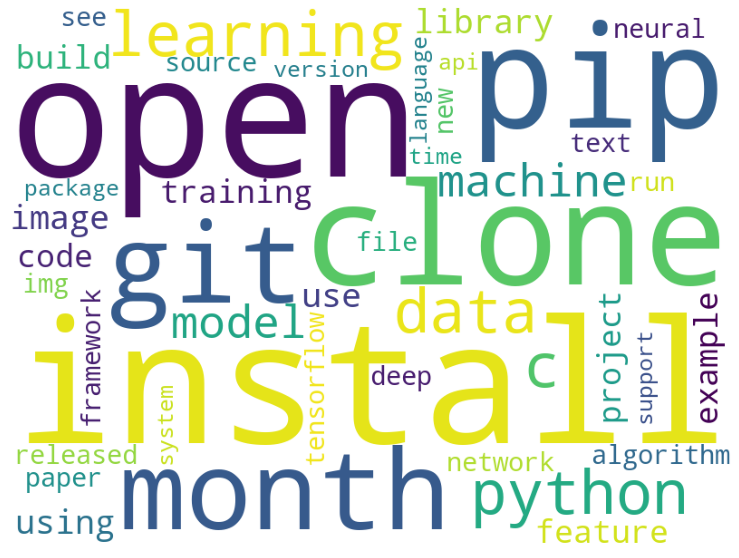

In [36]:
#Top 50 words
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col ,50)
    print(' ')

In [37]:
def generate_category_words(df, categorical = 'language'):
    """ Joins all words in each news article per category. Outputs dataframe with all_words by category."""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized)
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized)
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [38]:
def generate_word_count_df(all_words_df):
    
    
    all_words_df = pd.concat([all_words_df, all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    # Transpose and fill NaN with 0
    all_words_df = all_words_df.T.fillna(0)
    
    # Drop the all_words row
    all_words_df = all_words_df.drop(all_words_df.index[0])
        
    return all_words_df

In [39]:
def plot_bigrams(df, category):
    """ Accepts all words dataframe and outputs plots of top 20 bigrams and wordcloud """
    # Generate bigrams
    bigrams = list(nltk.ngrams(all_words_df.T[category]['all_words'].split(),2))
    # Take top 20
    top_20_cat_bigrams = pd.Series(bigrams).value_counts().head(20)
    
    # Plot bar chart
    top_20_cat_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
    
    # Ensure only integer values for x axis
    plt.xticks(range(top_20_cat_bigrams.sort_values().max()+1))

    plt.title(f'20 Most frequently occuring {category} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_cat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    
    # Plot wordcloud
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_cat_bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    plt.show()

In [40]:
train['lem_length'] = df.lemmatized.str.len()
train.groupby('language').lem_length.median()
all_words_df=generate_category_words(train)
word_counts = generate_word_count_df(all_words_df)

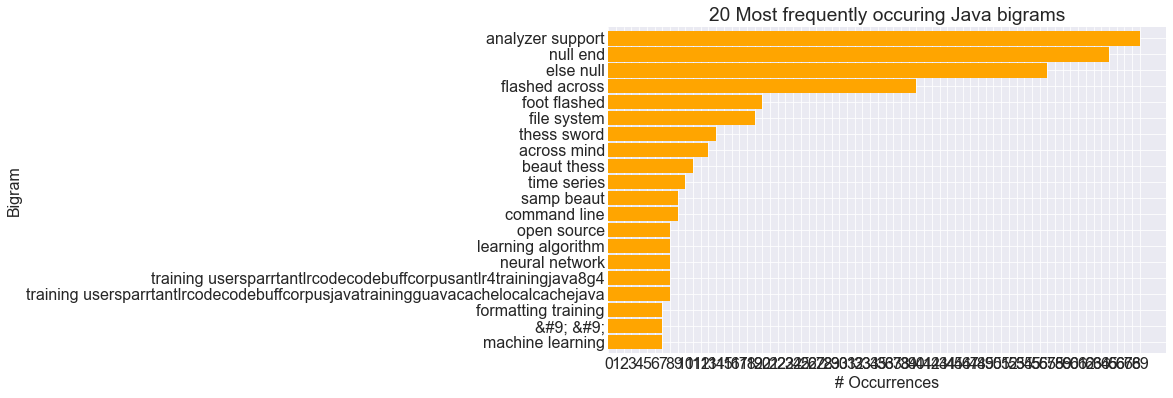

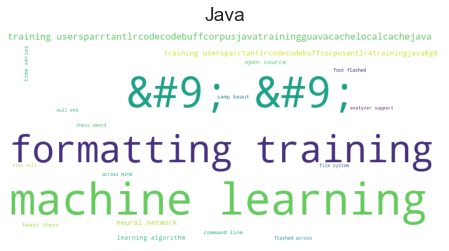

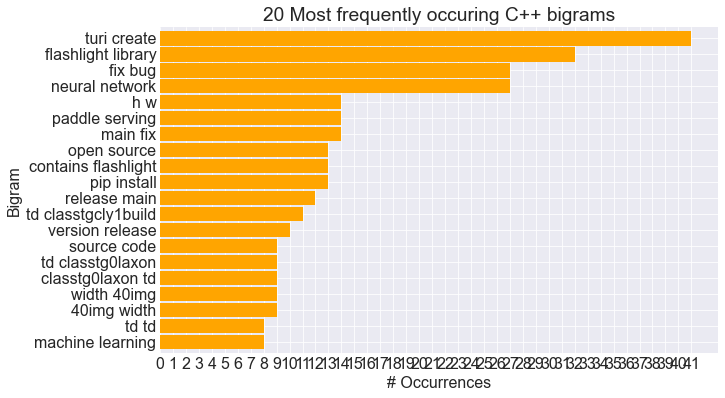

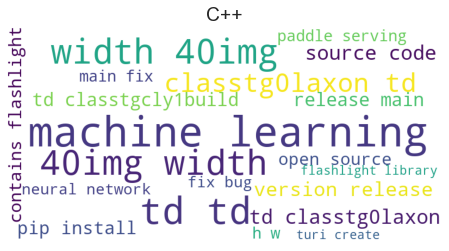

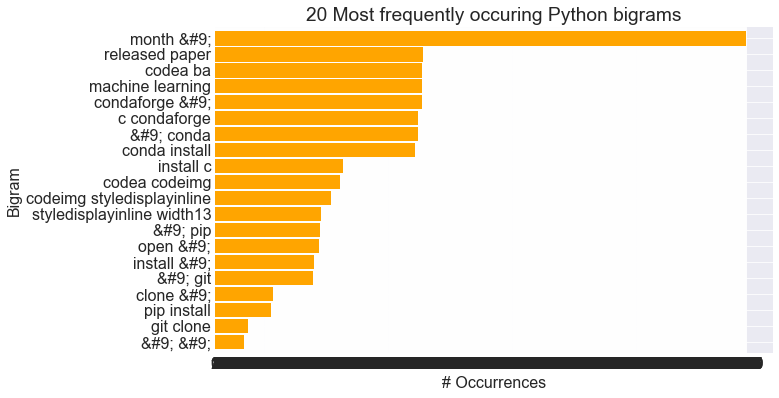

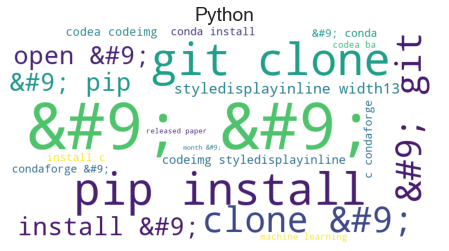

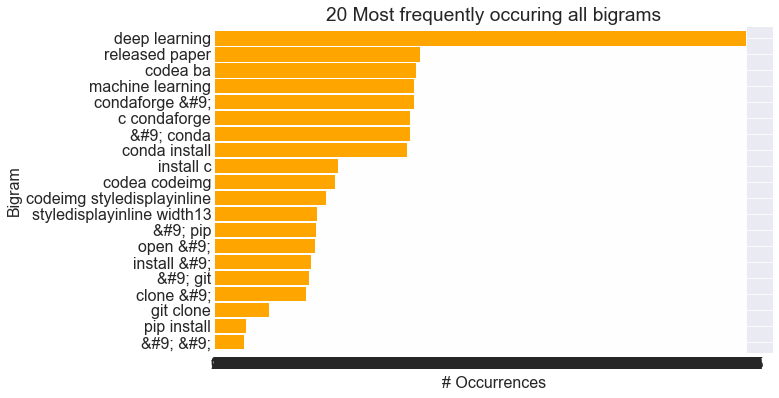

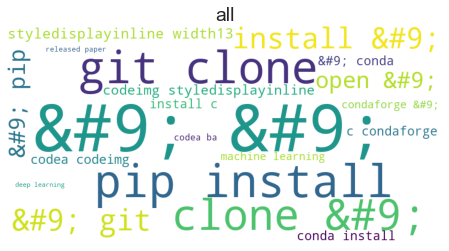

In [41]:
for col in word_counts.columns[:]:
    plot_bigrams(all_words_df, col)
    plt.show()

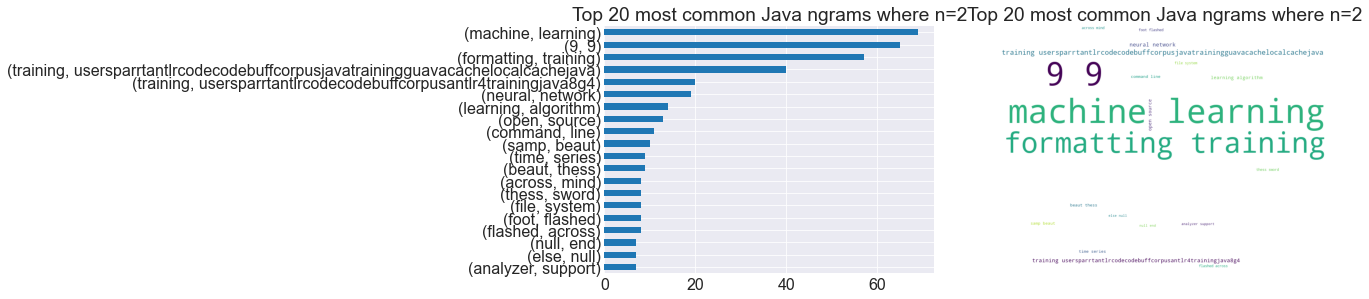

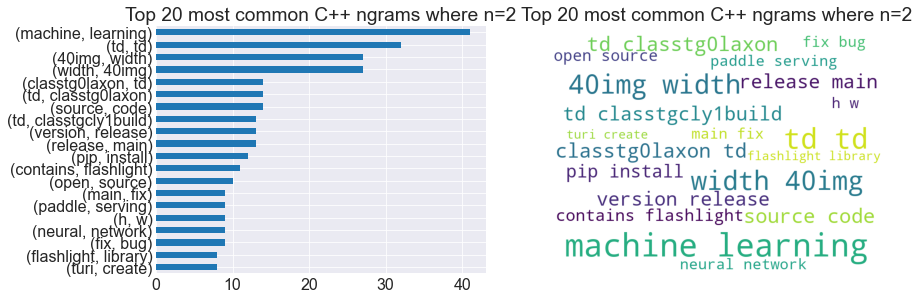

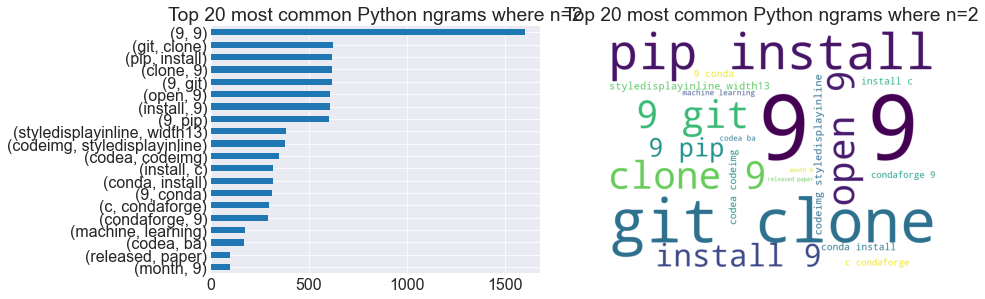

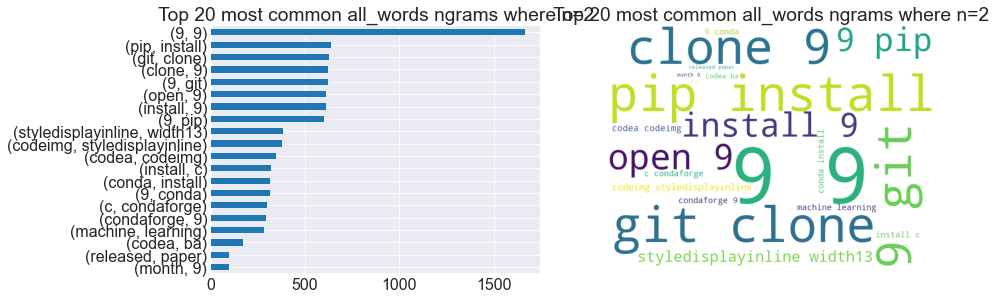

In [42]:
#bigrams
for key in join_text.keys():
    print (' ')
    ngrams_wordcloud(join_text[key], key)
    print (' ')

# Does the length of the README vary by programming language?

In [43]:
#create a column with readme lenght
train['readme_length'] = train.lemmatized.apply(len)

In [44]:
train.head(3)

repo language  \
29         Waikato/meka     Java   
86   StanfordSNR/puffer      C++   
133       rasbt/mlxtend   Python   

                                       readme_contents  \
29   # Meka\n\nThe MEKA project provides an open so...   
86   # Puffer\n\nPuffer ([puffer.stanford.edu](http...   
133  [![DOI](https://joss.theoj.org/papers/10.21105...   

                                                 clean  \
29   meka project provides open source implementati...   
86   free opensource live tv streaming also researc...   
133  statu machine learning extensions python libra...   

                                               stemmed  \
29   meka project provid open sourc implement metho...   
86   free opensourc live tv stream also research st...   
133  statu machin learn extens python librari use t...   

                                            lemmatized  lem_length  \
29   meka project provides open source implementati...         545   
86   free opensource live tv streaming also researc...         136   
133  statu machine learning extension python librar...        1923   

     readme_length  
29             545  
86             136  
133           1923

In [45]:
train.groupby('language').readme_length.mean()

language
C++       2680.714286
Java      2766.000000
Python    9963.035714
Name: readme_length, dtype: float64

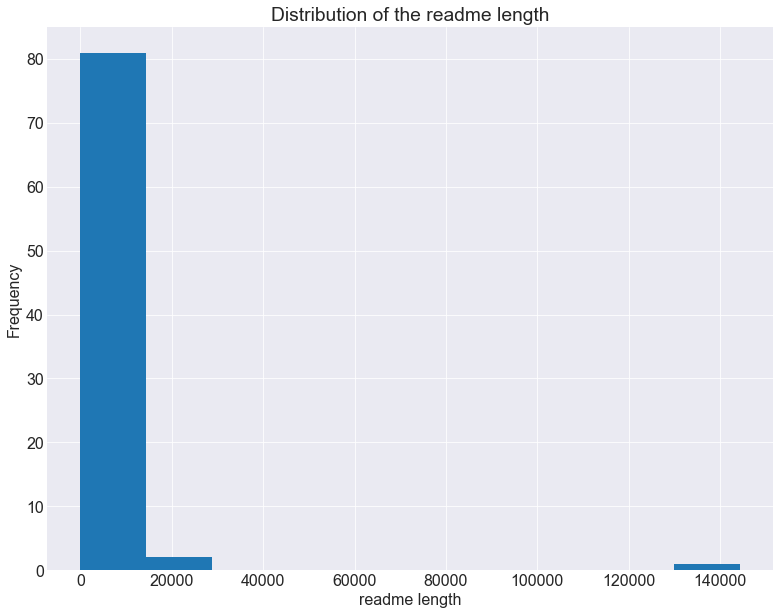

In [46]:
train.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

In [47]:
#create a new column
train['word_count'] = train.lemmatized.apply(basic_clean).apply(str.split).apply(len)

In [48]:
train.head(3)

repo language  \
29         Waikato/meka     Java   
86   StanfordSNR/puffer      C++   
133       rasbt/mlxtend   Python   

                                       readme_contents  \
29   # Meka\n\nThe MEKA project provides an open so...   
86   # Puffer\n\nPuffer ([puffer.stanford.edu](http...   
133  [![DOI](https://joss.theoj.org/papers/10.21105...   

                                                 clean  \
29   meka project provides open source implementati...   
86   free opensource live tv streaming also researc...   
133  statu machine learning extensions python libra...   

                                               stemmed  \
29   meka project provid open sourc implement metho...   
86   free opensourc live tv stream also research st...   
133  statu machin learn extens python librari use t...   

                                            lemmatized  lem_length  \
29   meka project provides open source implementati...         545   
86   free opensource live tv streaming also researc...         136   
133  statu machine learning extension python librar...        1923   

     readme_length  word_count  
29             545          74  
86             136          19  
133           1923         238

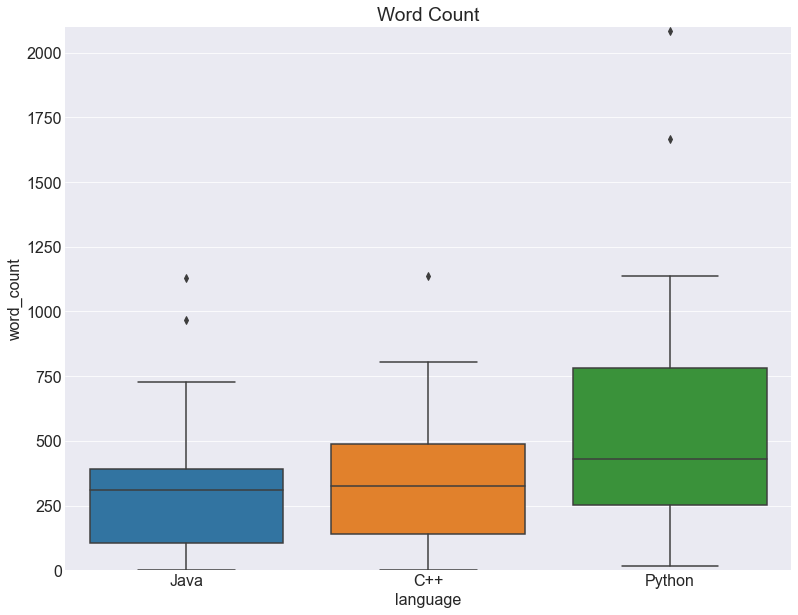

In [49]:
sns.boxplot(x='language',y ='word_count', data= train)
plt.ylim(0, 2100)
plt.title('Word Count')
plt.show()

(0.0, 16000.0)

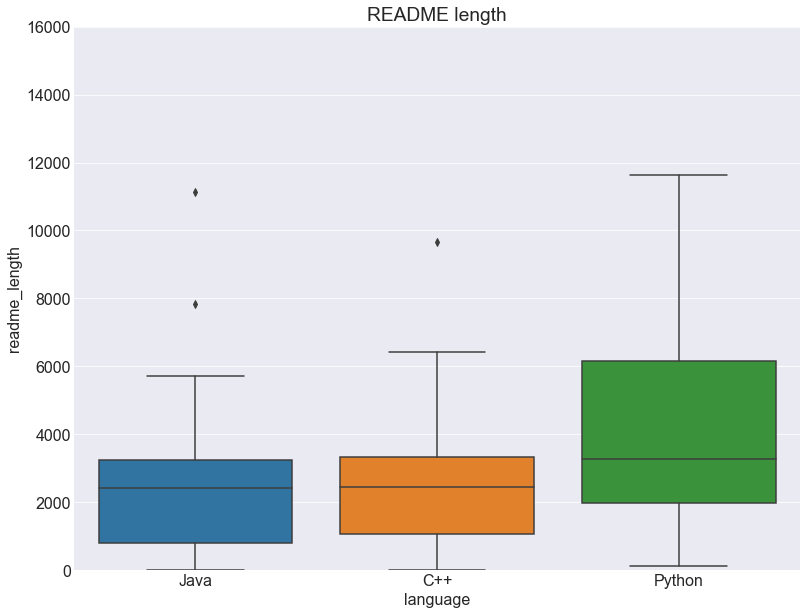

In [50]:
sns.boxplot(x='language',y ='readme_length', data= train)
plt.title('README length')
plt.ylim(0, 16000)

# Do different programming languages use a different number of unique words?

In [51]:
uniq_words={}
# Get a list of the unique words by language
for key in join_text:
    uniq_words [key] =  list(pd.Series(join_text[key].split()).unique())

******************************UNIQUE WORDS FOR Java ***************************** 


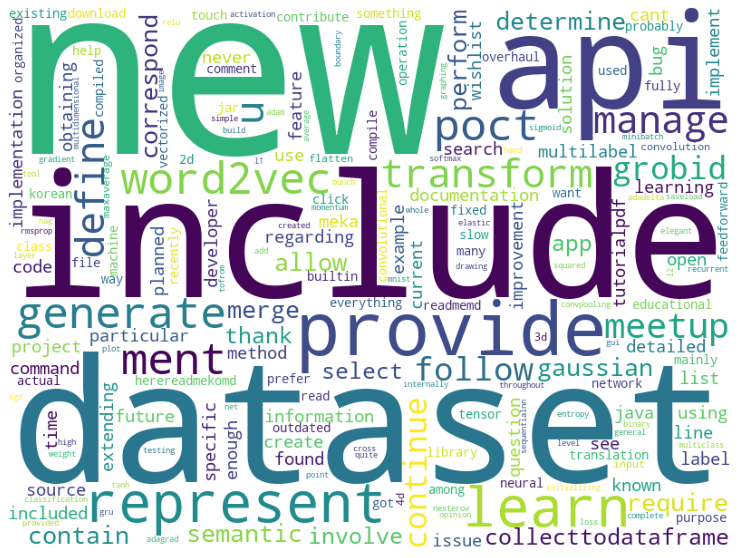

******************************UNIQUE WORDS FOR C++ ***************************** 


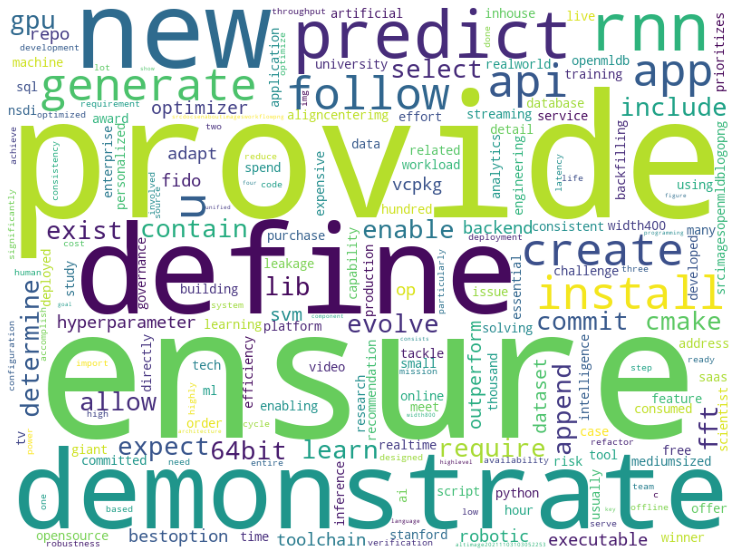

******************************UNIQUE WORDS FOR Python ***************************** 


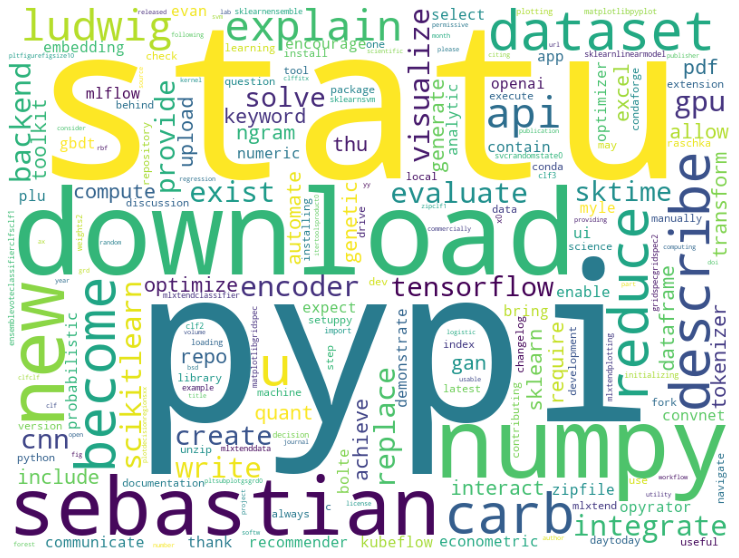

******************************UNIQUE WORDS FOR all_words ***************************** 


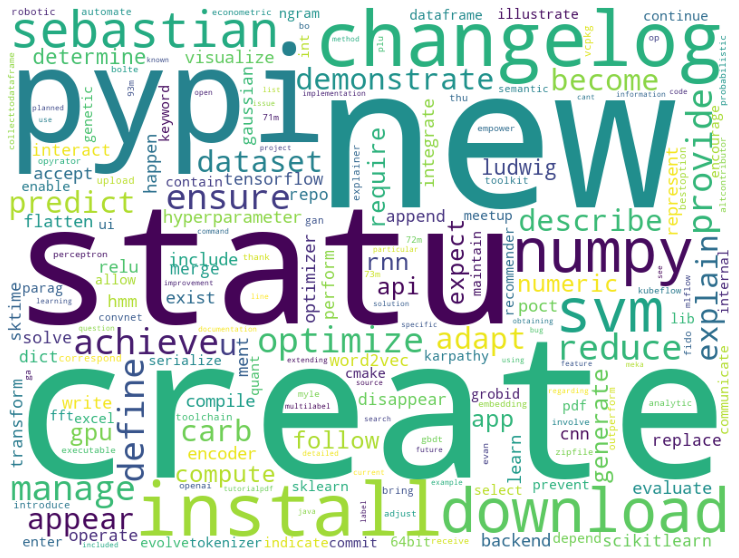

In [52]:
for key in uniq_words:    
    print(f'******************************UNIQUE WORDS FOR {key} ***************************** ')
    word_cloud (' '.join(uniq_words[key]))

In [53]:
#create a dictionary of how many unique words each language have in their readme files
len_uniq_df={}
for key in uniq_words:
    len_uniq_df[key] = len(uniq_words[key])

In [54]:
#create a df of unique words by language
uni_by_lang = pd.DataFrame(len_uniq_df, index= ['unique_words'])

In [55]:
uni_by_lang

Java   C++  Python  all_words
unique_words  3058  2959    6702       9626

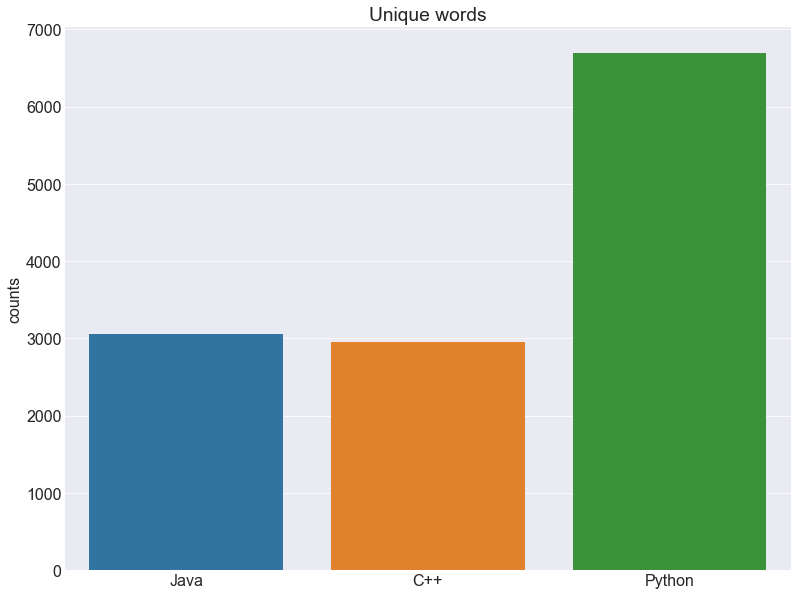

In [56]:
sns.barplot(data=uni_by_lang.drop(columns=['all_words']))
plt.ylabel('counts')
plt.title("Unique words")
plt.show()